# Exploratory Data Analysis

### Adding project path to system path

In [1]:
import pandas as pd
import os
notebook_dir = os.getcwd()
parent_path=os.path.dirname(notebook_dir)

os.chdir(parent_path)

### Import modules

In [2]:
from script.Fraud_data_preprocessing import FraudDataPreprocessing

### Instantce of the class

In [3]:
preprocessing=FraudDataPreprocessing()

### Load data sets

In [4]:
fraud_data,ip_country_data,creditcard_data=preprocessing.load_data()
fraud_data.head()


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [5]:
ip_country_data.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [6]:
creditcard_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Overview

In [7]:
preprocessing.data_overview(fraud_data)

Number of rows:151112
Number of columns:11
Data types of each column:
user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object


In [8]:
preprocessing.data_overview(creditcard_data)

Number of rows:284807
Number of columns:31
Data types of each column:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


## Check missing data

In [9]:
preprocessing.check_missing(fraud_data)

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [10]:
preprocessing.check_missing(ip_country_data)

lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64

In [11]:
preprocessing.check_missing(creditcard_data)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**Implication**

There is no missing data in all the fraud dataset ,credit card dataset and country ip dataset.

## Cleaning data

In [12]:
preprocessing.data_cleaning(fraud_data)

Duplicates are removed from fraud data!
Timestamps are converted!


## Exploratory Data Analysis (EDA)

* Univariate analysis
* Bivariate analysis


### Univariate Analysis

In [13]:
preprocessing.summarize_dataset(fraud_data,['purchase_value'])

,Mean,Median,Mode,Standard Deviation,Variance,Range,IQR,Skewness,Kurtosis
purchase_value,36.935372,35.0,28,18.322762,335.723613,145,27.0,0.670485,0.138292


In [14]:
preprocessing.summarize_dataset(creditcard_data,['Amount'])

,Mean,Median,Mode,Standard Deviation,Variance,Range,IQR,Skewness,Kurtosis
Amount,88.349619,22.0,1.0,250.120109,62560.069046,25691.16,71.565,16.977724,845.092646


### Plot Catagorical features frequency Distribution

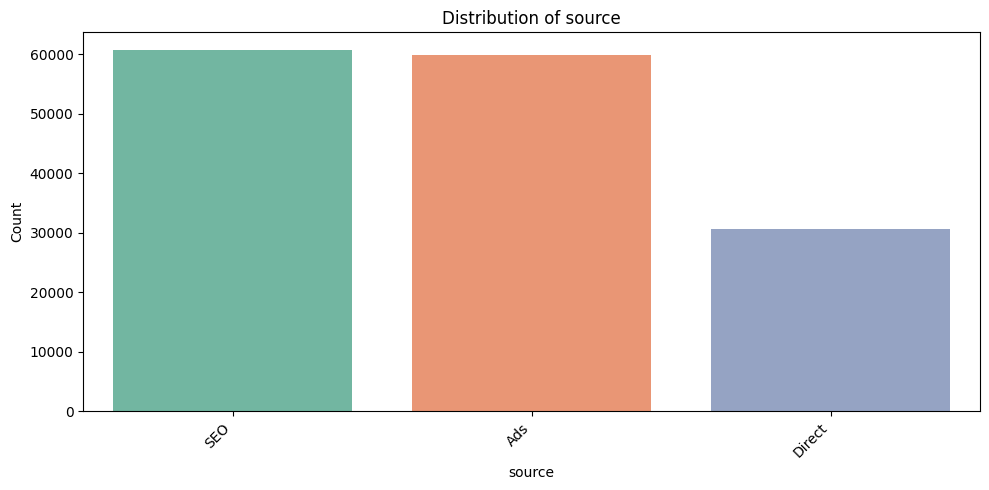

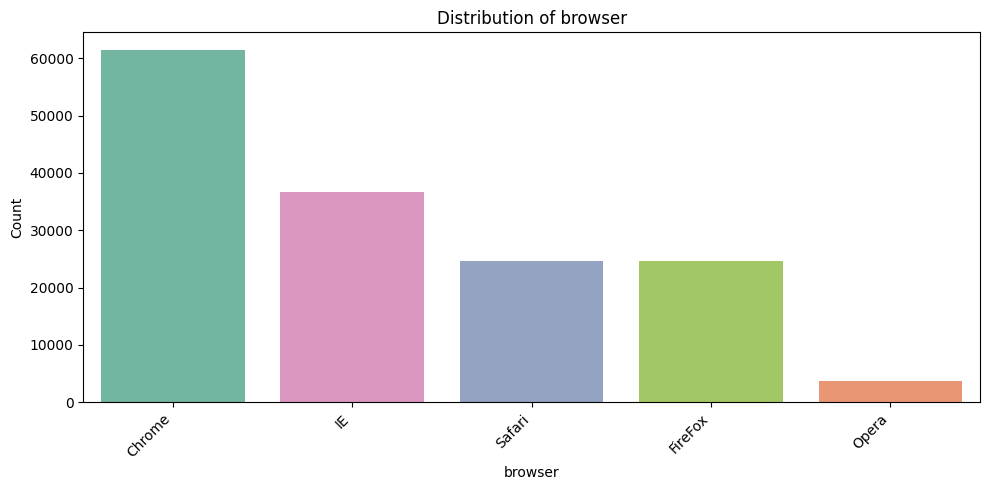

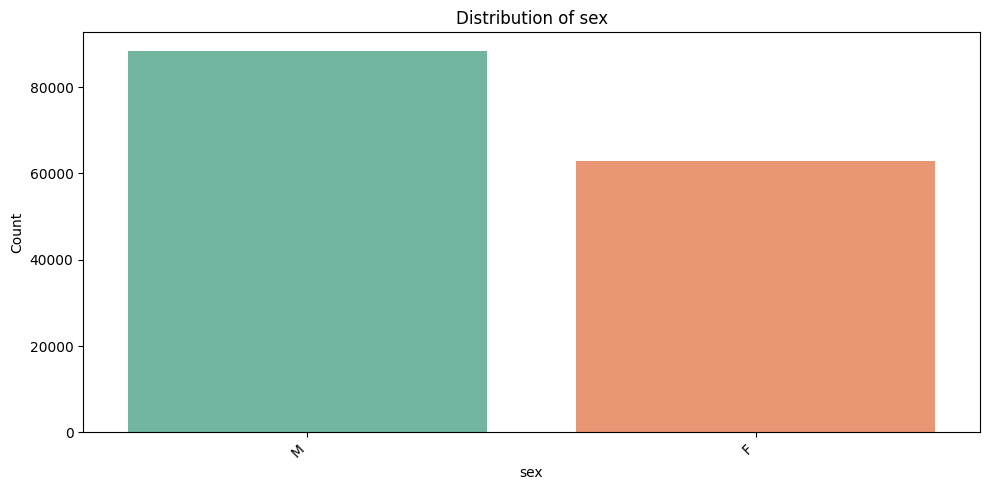

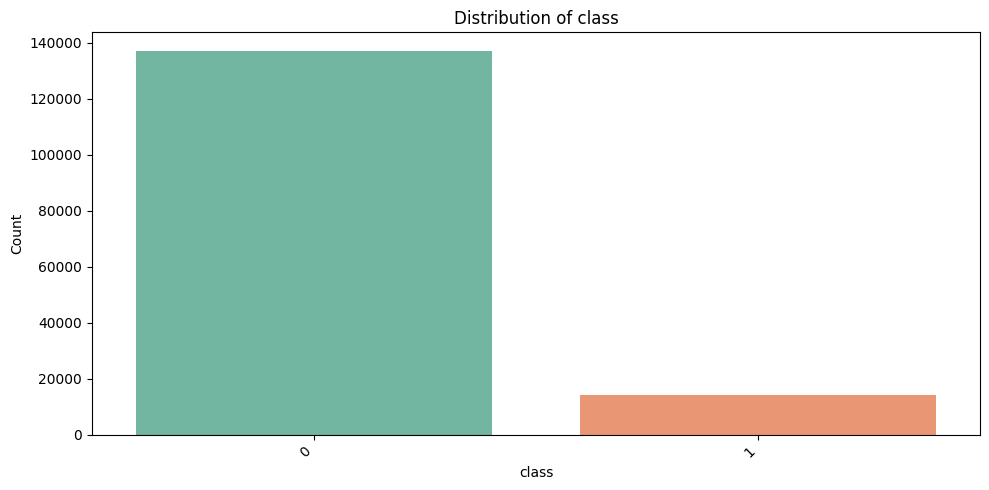

In [15]:
preprocessing.plot_univariate(fraud_data)